In [119]:
import matplotlib.pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import json

import catboost as cat
import shap

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def read_model(file_name):
    model = cat.CatBoostClassifier() 
    model.load_model('second_model_11f')
    return(model)

In [261]:
def read_json(file_name):
    
    with open(file_name, "r") as read_file:
        data = json.load(read_file)
    return(pd.DataFrame(data).T)

In [262]:
f29p = read_json("positive.json")
f29n = read_json("negative_set_polb.json")

In [263]:
print(f29p.shape)
print(f29n.shape)

(276, 10)
(2003, 10)


In [264]:
f29p["target"] = [1 for i in range(f29p.shape[0])]
f29n["target"] = [0 for i in range(f29n.shape[0])]

f29 = pd.concat([f29p, f29n])
f29.shape

(2279, 11)

In [249]:
f29.head()

,catalytic,dntp_binding,primer_binding,exonuclease,Mg,replication_activity,conservative,ssbonds,pockets,coevolution,target
tr|A0A2S1GQF7|A0A2S1GQF7_9CAUD,"[M, P, P]","[Y, Q, K, A, G, Y, Y]","[V, S, D, V, N, R, -, F]","[A, Q, K, E, M, L, L, Y, K, Y, Y, N, A, G, C, P]","[K, N, D, L, M, P]","[F, N, Y, F, M, F, P, G, A, -, D, S, Y, S, N, ...","[P, Y, D, G, S, L, K, Y, I, V, D, L, K, G, E, ...","[[I, M], [V, L], [F, V], [N, C]]","[I, -, -, -, V, -]","[[G, Y], [N, G], [N, Q], [G, V], [N, -], [F, V...",1
tr|A0A0M9JDK6|A0A0M9JDK6_9CAUD,"[M, P, P]","[Y, Q, K, A, G, Y, Y]","[V, S, D, V, N, R, -, F]","[A, Q, K, E, M, L, L, Y, K, Y, Y, N, A, G, C, P]","[K, N, D, L, M, P]","[F, N, Y, F, M, F, P, G, A, -, D, S, Y, S, N, ...","[P, Y, D, G, S, L, K, Y, I, V, D, L, K, G, E, ...","[[I, M], [V, L], [F, V], [N, C]]","[I, -, -, -, V, -]","[[G, Y], [N, G], [N, Q], [G, V], [N, -], [F, V...",1
tr|C7BV40|C7BV40_9CAUD,"[S, P, Y]","[Y, R, K, A, S, Y, W]","[V, S, D, L, S, R, -, V]","[E, H, K, E, M, L, L, Y, E, H, F, N, A, S, N, P]","[K, N, D, L, S, P]","[F, S, F, Y, V, Y, A, G, A, -, D, S, Y, S, S, ...","[P, Y, D, G, S, L, K, Y, I, V, D, L, K, G, E, ...","[[C, H], [A, F], [F, I], [N, L]]","[L, -, -, -, V, -]","[[G, Y], [N, G], [N, Q], [G, L], [N, -], [F, V...",1
tr|A0A0E3HLI0|A0A0E3HLI0_9CAUD,"[S, P, Y]","[Y, R, K, A, S, Y, W]","[I, S, D, L, S, R, -, V]","[E, H, K, E, M, M, L, Y, S, H, F, N, A, S, N, P]","[K, N, D, L, S, P]","[F, S, F, Y, V, Y, A, G, A, -, D, S, Y, S, S, ...","[P, Y, D, G, S, L, K, Y, I, V, D, L, K, G, E, ...","[[C, H], [A, Y], [F, I], [N, L]]","[L, -, -, -, V, -]","[[G, Y], [N, G], [N, Q], [G, L], [N, -], [F, I...",1
tr|A0A249XWF2|A0A249XWF2_9CAUD,"[M, P, P]","[Y, Q, K, A, G, Y, W]","[I, S, D, V, N, R, -, F]","[T, K, K, E, L, L, L, Y, K, Y, Y, N, A, A, C, P]","[K, N, D, L, M, P]","[F, T, Y, F, M, Y, P, G, A, -, D, S, Y, S, N, ...","[P, Y, D, G, S, L, K, Y, I, V, D, L, K, G, E, ...","[[V, V], [A, L], [F, V], [N, L]]","[I, -, -, -, V, -]","[[G, Y], [N, G], [N, Q], [G, V], [N, -], [F, V...",1


In [354]:
colnames_generation = []
for i, ind in zip(f29.columns, range(10)):
    for num in range(len(f29.iloc[0, ind])):
            colnames_generation.append(i + "_" + str(num))

TypeError: object of type 'numpy.int64' has no len()

In [244]:
#make binary from ss and coevol
#ss bound - 95-98
#coevolution 105-112

def make_binary_disulf(ao_lists):
    result = ["1" if pair == ["C", "C"] else "0" for pair in ao_lists]
    return(result)
    
def make_binary_coev(ao_lists):
    desired_pairs = [['N', 'T'], 
                    ['K', 'N'], 
                    ['K', 'T'], 
                    ['N', 'D'], 
                    ['K', 'G'], 
                    ['N', 'R'], 
                    ['D', 'V'], 
                    ['D', 'R']]
    
    result = ["1" if pair == key else "0" for pair, key in zip(ao_lists, desired_pairs)]
    return(result)

In [267]:
f29 = f29.drop(columns=["coevolution"])

In [271]:
f29.ssbonds = f29.ssbonds.apply(make_binary_disulf)
#f29.coevolution = f29.coevolution.apply(make_binary_coev)

In [274]:
#make labels 
f29_label = pd.DataFrame()
for i in f29.columns: 
    f29_label = pd.concat([f29_label, pd.DataFrame(f29[i].tolist(), index= f29.index)], axis = 1)

f29_label.columns = [i for i in range(f29_label.shape[1] - 1)] + ["target"] 

In [282]:
f29_label

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,target
tr|A0A2S1GQF7|A0A2S1GQF7_9CAUD,M,P,P,Y,Q,K,A,G,Y,Y,...,0,0,0,I,-,-,-,V,-,1
tr|A0A0M9JDK6|A0A0M9JDK6_9CAUD,M,P,P,Y,Q,K,A,G,Y,Y,...,0,0,0,I,-,-,-,V,-,1
tr|C7BV40|C7BV40_9CAUD,S,P,Y,Y,R,K,A,S,Y,W,...,0,0,0,L,-,-,-,V,-,1
tr|A0A0E3HLI0|A0A0E3HLI0_9CAUD,S,P,Y,Y,R,K,A,S,Y,W,...,0,0,0,L,-,-,-,V,-,1
tr|A0A249XWF2|A0A249XWF2_9CAUD,M,P,P,Y,Q,K,A,G,Y,W,...,0,0,0,I,-,-,-,V,-,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tr|A0A377CW72|A0A377CW72_ECOLX,T,-,-,-,-,-,-,-,-,W,...,0,0,0,A,-,-,-,-,-,0
tr|A0A6D2GEB5|A0A6D2GEB5_SALER,-,-,-,E,-,-,-,-,-,-,...,0,0,0,L,-,-,-,-,-,0
tr|A0A3S4HS32|A0A3S4HS32_SALET,-,-,-,E,-,-,-,-,-,-,...,0,0,0,L,-,-,-,-,-,0
tr|Q6JYT3|Q6JYT3_ECOLX,-,-,-,Y,-,-,-,-,-,-,...,0,0,0,I,-,-,-,V,-,0


In [276]:
params = {
    'depth': [1, 4, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1, 0.15,0.2,0.5],
    'loss_function': ['Logloss', 'CrossEntropy'],
    'l2_leaf_reg': np.logspace(0.01, 2, 20),
    'leaf_estimation_iterations': [10],
    'logging_level': ['Silent'],
    'random_seed': [42],
    'iterations':[i for i in range(100, 1000, 100)]
}

In [ ]:
#11 features  

# good_features = ['conservative_6', 'exonuclease_10', 'Mg_3', 'primer_binding_5', 'dntp_binding_5', 'exonuclease_7', 'replication_activity_15', 'exonuclease_12', 'Mg_0', 'replication_activity_8', 'exonuclease_15', 'replication_activity_14', 
#                 "target"]
# f29_label = f29_label[good_features]

In [290]:
x_train, x_test_late, y_train, y_test_late = train_test_split(f29_label.drop("target",
                                                            axis=1),
                                                    f29_label['target'],
                                                    test_size=0.2,
                                                    random_state=42)

x_train.reset_index(drop=True,inplace = True)  
x_test_late.reset_index(drop=True,inplace = True)  
y_train.reset_index(drop=True,inplace = True)  
y_test_late.reset_index(drop=True,inplace = True) 

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.2,
                                                    random_state=42)
x_train.reset_index(drop=True,inplace = True)  
x_test.reset_index(drop=True,inplace = True)  
y_train.reset_index(drop=True,inplace = True)  
y_test.reset_index(drop=True,inplace = True)  

In [300]:
cat_feautures = x_train.columns
indexes_of_categories = [x_train.columns.get_loc(col) for col in cat_feautures]

In [301]:
clf = cat.CatBoostClassifier(eval_metric="Accuracy",cat_features=indexes_of_categories)

In [303]:
grid = RandomizedSearchCV(clf,
                          params,
                          n_jobs=1,
                          n_iter=10,
                          scoring="f1",
                          cv=5, 
                          verbose= 5)

grid.fit(x_train, y_train, cat_features=indexes_of_categories)
best_params = grid.best_estimator_.get_params()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4, score=1.000, total=  18.3s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s


[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4, score=0.971, total=  19.7s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.1s remaining:    0.0s


[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4, score=0.955, total=  19.9s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   58.0s remaining:    0.0s


[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4, score=1.000, total=  20.4s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=14.524636192513784, iterations=700, depth=4, score=0.954, total=  18.5s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.15, leaf_estimation_iterations=10, l2_leaf_reg=2.685019032003968, iterations=700, depth=1 
[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.15, leaf_estimation_iterations=10, l2_leaf_reg=2.685019032003968, iterations=700, depth=1, score=0.972, total=   1.8s
[CV] random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.15, leaf_estimation_iterations=10, l2_leaf_reg=2.685019032003968, iterations=700, depth=1 
[CV]  random_seed=42, loss_function=CrossEntropy, logging_level=Silent, learning_rate=0.15, leaf_estimation_iterations=10, l2_leaf_reg=2.685019032003968, iterations=700, depth=1, score=0.986, total=   1.8s
[CV] random_seed=42, los

[CV]  random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=5.535513251142126, iterations=600, depth=10, score=0.986, total=  42.2s
[CV] random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=5.535513251142126, iterations=600, depth=10 
[CV]  random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=5.535513251142126, iterations=600, depth=10, score=0.955, total=  44.3s
[CV] random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=5.535513251142126, iterations=600, depth=10 
[CV]  random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.001, leaf_estimation_iterations=10, l2_leaf_reg=5.535513251142126, iterations=600, depth=10, score=0.970, total=  36.7s
[CV] random_seed=42, loss_function=Loglos

[CV]  random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.1, leaf_estimation_iterations=10, l2_leaf_reg=48.5053311262506, iterations=400, depth=1, score=1.000, total=   1.1s
[CV] random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.1, leaf_estimation_iterations=10, l2_leaf_reg=48.5053311262506, iterations=400, depth=1 
[CV]  random_seed=42, loss_function=Logloss, logging_level=Silent, learning_rate=0.1, leaf_estimation_iterations=10, l2_leaf_reg=48.5053311262506, iterations=400, depth=1, score=0.939, total=   1.0s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.5min finished


In [304]:
print(best_params)

{'cat_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104], 'eval_metric': 'Accuracy', 'logging_level': 'Silent', 'random_seed': 42, 'leaf_estimation_iterations': 10, 'loss_function': 'Logloss', 'l2_leaf_reg': 1.657576894020339, 'depth': 7, 'learning_rate': 0.15, 'iterations': 200}


In [305]:
clf_cat = cat.CatBoostClassifier(**best_params).fit(x_train, y_train,cat_features=indexes_of_categories)
y_pred = clf_cat.predict(x_test)
y_pred_proba = clf_cat.predict_proba(x_test)[:,-1]

In [310]:
y_pred_late = clf_cat.predict(x_test_late)
y_pred_proba_late = clf_cat.predict_proba(x_test_late)[:,-1]

In [312]:
print(classification_report(y_test_late, y_pred_late))
print(roc_auc_score(y_test_late, y_pred_late))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00        55

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456

1.0


In [309]:
path = "GH_model"
model_name = "first_model"
clf_cat.save_model(path + "/" + model_name)

In [307]:
shap_values = clf_cat.get_feature_importance(cat.Pool(x_test, label=y_test,
                                                      cat_features=indexes_of_categories), 
                                                                     type="ShapValues")

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

In [43]:
shap_values

array([[ 0.20833229,  0.        ,  0.        , -0.49457983, -1.03209461,
        -0.16135288,  1.38035583,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983, -1.03209461,
        -0.16135288, -1.37301741,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983, -1.03209461,
         0.11151967,  0.03514376,  0.02223419],
       [ 0.20833229,  0.        ,  0.        ,  1.42878619,  0.97665056,
         0.11151967,  1.38035583,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983,  0.97665056,
         0.11151967,  1.38035583,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983, -1.03209461,
        -0.16135288, -1.37301741,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983,  0.73199258,
         0.11151967,  1.38035583,  0.02223419],
       [ 0.20833229,  0.        ,  0.        , -0.49457983, -1.03209461,
        -0.16135288, -1.04635021,  0.02223419],
       [ 0.20833229,  0.        

In [320]:
f29_label_p = f29_label[f29_label.target == 1]
f29_label_n = f29_label[f29_label.target == 0]

In [321]:
f29_label_p.shape

(276, 106)

In [323]:
f29_label_p[67].value_counts()

K    266
D      3
G      2
Q      1
Y      1
-      1
T      1
W      1
Name: 67, dtype: int64

In [324]:
f29_label_n[67].value_counts()

S    1503
-     181
T      85
R      84
A      38
N      29
K      23
E      16
M      11
Q       6
G       5
D       5
V       5
I       4
L       4
H       2
X       1
F       1
Name: 67, dtype: int64

In [325]:
f29_label_p[28].value_counts()

Y    176
F     90
H      8
-      2
Name: 28, dtype: int64

In [326]:
f29_label_n[28].value_counts()

L    1804
-      66
F      36
V      26
Y      24
N      11
T      11
I       6
A       4
S       3
R       2
E       2
W       2
M       2
P       1
H       1
G       1
K       1
Name: 28, dtype: int64

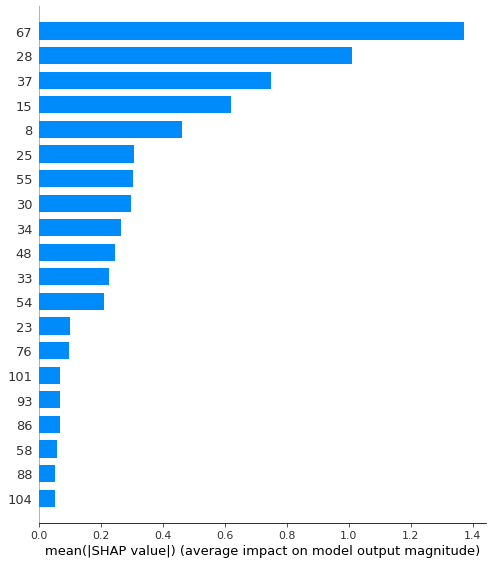

In [340]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

In [118]:
def catboost_model(x_train, x_test, y_train, y_test, cat_feautures, params):
    
    indexes_of_categories = [x_train.columns.get_loc(col) for col in cat_feautures]
    
    #parametrs search 
    clf = cat.CatBoostClassifier(eval_metric="Accuracy",cat_features=indexes_of_categories)
    grid = RandomizedSearchCV(clf,
                          params,
                          n_jobs=1,
                          n_iter=10,
                          scoring="f1",
                          cv=5)
    
    grid.fit(x_train, y_train)
    best_params = grid.best_estimator_.get_params()
    
    print(best_params)
    
    #fit predict
    clf_cat = cat.CatBoostClassifier(**best_params).fit(x_train, y_train,cat_features=indexes_of_categories)
    y_pred = clf_cat.predict(x_test)
    y_pred_proba = clf_cat.predict_proba(x_test)[:,-1]
    
    #quality
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    
    return(clf_cat)

In [67]:
def feature_selection(clf, x_test, y_test, cat_feautures):
    
    indexes_of_categories = [x_train.columns.get_loc(col) for col in cat_feautures]
    shap_values = clf.get_feature_importance(cat.Pool(x_test, label=y_test,
                                                      cat_features=indexes_of_categories), 
                                                                     type="ShapValues")
    #meanings 
    expected_value = shap_values[0,-1]
    shap_values = shap_values[:,:-1]
    
    #plot importance
    shap.summary_plot(shap_values, x_test, plot_type="bar")
    
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(x_train.columns,vals)),columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
    feature_importance.reset_index(drop=True,inplace = True) 
    
    return(feature_importance)

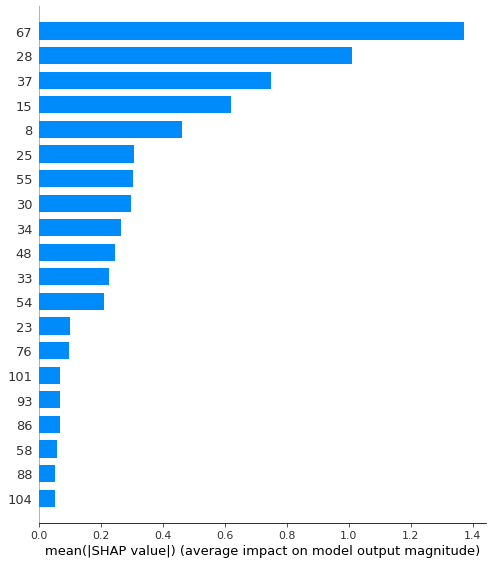

In [333]:
y = feature_selection(clf_cat, x_test, y_test, cat_feautures)

In [374]:
rename_columns = rename_columns.to_dict()

In [382]:
y["new_name"] = y.col_name.apply(lambda x: rename_columns['new_name'][x])

In [384]:
y.head(45)

,col_name,feature_importance_vals,new_name
0,67,1.373504,conservative_6
1,28,1.010077,exonuclease_10
2,37,0.750144,Mg_3
3,15,0.619701,primer_binding_5
4,8,0.460686,dntp_binding_5
5,25,0.307692,exonuclease_7
6,55,0.303968,replication_activity_15
7,30,0.295330,exonuclease_12
8,34,0.265571,Mg_0
9,48,0.246468,replication_activity_8


In [387]:
list(y.new_name[0:12])

['conservative_6',
 'exonuclease_10',
 'Mg_3',
 'primer_binding_5',
 'dntp_binding_5',
 'exonuclease_7',
 'replication_activity_15',
 'exonuclease_12',
 'Mg_0',
 'replication_activity_8',
 'exonuclease_15',
 'replication_activity_14']

In [342]:
y.to_csv("feature_importance.csv")